<a href="https://colab.research.google.com/github/Utkarsh87/Beginner-CNN-Projects/blob/master/Facial_Keypoints_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import pandas as pd
import zipfile

tf.__version__

'2.2.0-rc2'

In [7]:
from google.colab import files
uploaded = files.upload()

Saving IdLookupTable.csv to IdLookupTable.csv


In [0]:
def unzip_file(name):
  zipped_file = name
  zip_ref = zipfile.ZipFile(zipped_file, 'r')
  zip_ref.extractall('.')
  zip_ref.close()

In [0]:
unzip_file('training.zip')
unzip_file('test.zip')

In [0]:
train_df = pd.read_csv('training.csv')
test_df = pd.read_csv('test.csv')
lookupID_df = pd.read_csv('IdLookupTable.csv')

In [11]:
train_df.head().T

,0,1,2,3,4
left_eye_center_x,66.0336,64.3329,65.0571,65.2257,66.7253
left_eye_center_y,39.0023,34.9701,34.9096,37.2618,39.6213
right_eye_center_x,30.227,29.9493,30.9038,32.0231,32.2448
right_eye_center_y,36.4217,33.4487,34.9096,37.2618,38.042
left_eye_inner_corner_x,59.5821,58.8562,59.412,60.0033,58.5659
left_eye_inner_corner_y,39.6474,35.2743,36.321,39.1272,39.6213
left_eye_outer_corner_x,73.1303,70.7227,70.9844,72.3147,72.5159
left_eye_outer_corner_y,39.97,36.1872,36.321,38.381,39.8845
right_eye_inner_corner_x,36.3566,36.0347,37.6781,37.6186,36.9824
right_eye_inner_corner_y,37.3894,34.3615,36.321,38.7541,39.0949


In [12]:
train_df.shape

(7049, 31)

In [13]:
test_df.head().T

,0,1,2,3,4
ImageId,1,2,3,4,5
Image,182 183 182 182 180 180 176 169 156 137 124 10...,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...,177 176 174 170 169 169 168 166 166 166 161 14...,176 174 174 175 174 174 176 176 175 171 165 15...,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...


In [14]:
lookupID_df.head().T

,0,1,2,3,4
RowId,1,2,3,4,5
ImageId,1,1,1,1,1
FeatureName,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x
Location,NaN,NaN,NaN,NaN,NaN


In [15]:
# check for nan values in training set
train_df.isnull().any().value_counts()

True     28
False     3
dtype: int64

In [16]:
# Fill nan with value in previous row
train_df.fillna(method='ffill', inplace=True)
train_df.isnull().any().value_counts()

False    31
dtype: int64

In [17]:
# check for nan values in test set
test_df.isnull().any().value_counts()

False    2
dtype: int64

In [0]:
# Separate out feature and labels
image = []
for i in range(0, train_df.shape[0]):
  img = train_df['Image'][i].split(' ')
  img = ['0' if x == '' else x for x in img]  # takes care of missing values too
  image.append(img)

In [0]:
# Define training data
x_train = np.array(image, dtype='float').reshape(-1, 96, 96, 1)

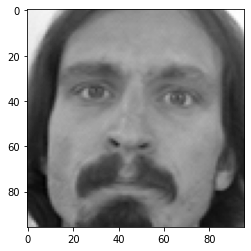

In [22]:
# See the first image
plt.imshow(x_train[0].reshape(96, 96), cmap='gray')
plt.show()

In [0]:
# Separate labels out from the image data
train_labels = train_df.drop('Image', axis=1)
y_train = []
for i in range(0, train_df.shape[0]):
  y = train_labels.iloc[i,:]
  y_train.append(y)

y_train = np.array(y_train, dtype='float')

In [0]:
x_train /= 255.0

**Build the model**

In [0]:
from tensorflow.keras.layers import Conv2D, Flatten, Dropout, Dense, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Sequential

In [27]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='elu', padding='same', use_bias=True, input_shape=(96, 96, 1)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='elu', padding='same', use_bias=True))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='elu', padding='same', use_bias=True))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.30))

model.add(Conv2D(64, (3, 3), activation='elu', padding='same', use_bias=True))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='elu', padding='same', use_bias=True))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='elu', padding='same', use_bias=True))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.35))

model.add(Conv2D(128, (3, 3), activation='elu', padding='same', use_bias=True))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), activation='elu', padding='same', use_bias=True))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.35))

model.add(Conv2D(512, (3, 3), activation='elu', padding='same', use_bias=True))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), activation='elu', padding='same', use_bias=True))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.40))

model.add(Flatten())

model.add(Dense(512, activation='elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(30))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 96, 96, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 96, 96, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 96, 96, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 64)        0

**Compile model**

In [0]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'accuracy'])

**Fit the model to the training data**

In [0]:
epochs = 50
batch_size = 128
import tensorflow as tf
callbacks = [tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, mode='auto', min_lr=1e-5)]

In [30]:
history = model.fit(x_train, y_train, callbacks=callbacks, epochs=epochs, batch_size=batch_size, validation_split=0.2)

Epoch 1/50
45/45 [==============================] - 34s 753ms/step - loss: 2652.5664 - mae: 47.9512 - accuracy: 0.0493 - val_loss: 3607.2444 - val_mae: 54.4931 - val_accuracy: 0.3121 - lr: 0.0010
Epoch 2/50
45/45 [==============================] - 32s 719ms/step - loss: 2536.6257 - mae: 46.7631 - accuracy: 0.0534 - val_loss: 4206.0498 - val_mae: 59.9227 - val_accuracy: 0.2113 - lr: 0.0010
Epoch 3/50
45/45 [==============================] - 32s 718ms/step - loss: 2187.3025 - mae: 42.9363 - accuracy: 0.0647 - val_loss: 2955.8235 - val_mae: 50.5890 - val_accuracy: 0.1887 - lr: 0.0010
Epoch 4/50
45/45 [==============================] - 32s 717ms/step - loss: 1576.3424 - mae: 35.2336 - accuracy: 0.1365 - val_loss: 2076.6111 - val_mae: 41.5990 - val_accuracy: 0.0936 - lr: 0.0010
Epoch 5/50
45/45 [==============================] - 32s 718ms/step - loss: 903.5557 - mae: 24.7142 - accuracy: 0.1828 - val_loss: 739.5688 - val_mae: 22.0585 - val_accuracy: 0.3170 - lr: 0.0010
Epoch 6/50
45/45 [====

Text(0.5, 1.0, 'Training and Validaiton loss per epoch')

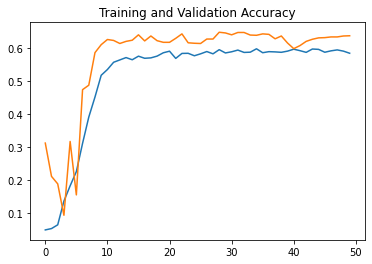

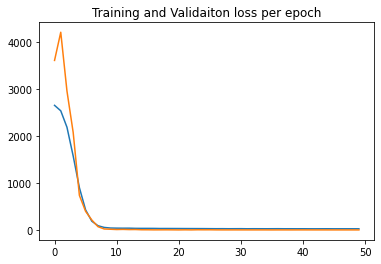

In [31]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# Plot retrieved data
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title("Training and Validation Accuracy")

plt.figure()

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title("Training and Validaiton loss per epoch")

**Prepare the testing data**

In [0]:
test_image = []
for i in range(0, test_df.shape[0]):
  img = test_df['Image'][i].split(' ')
  img = ['0' if x == '' else x for x in img]
  test_image.append(img)

In [0]:
x_test = np.array(test_image, dtype='float').reshape(-1, 96, 96, 1)

In [34]:
x_test.shape

(1783, 96, 96, 1)

In [0]:
x_test /= 255.0

In [38]:
predictions = model.predict(x_test)

print(predictions[0])

[64.88346  36.54279  29.407146 36.44824  58.36149  36.65305  72.47069
 35.938435 36.000988 37.48438  21.839657 38.122566 54.071957 28.737486
 78.81294  28.324057 38.503254 29.958109 15.065271 31.488287 46.885002
 59.01747  65.35248  72.34116  32.765102 74.72995  48.43794  72.1419
 47.148327 78.79411 ]


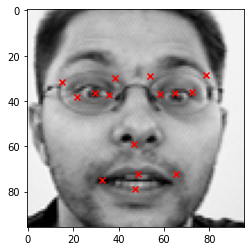

In [39]:
plt.imshow(x_test[0].reshape(96, 96), cmap='gray')
plt.scatter(predictions[0][0::2], predictions[0][1::2], c='red', marker='x')

In [40]:
# Print out the best 5 metrics
from statistics import mean
val_acc.sort()
val_loss.sort()
val_mae = history.history['val_mae']
val_mae.sort()
print("Top 5 validation loss: ", mean(val_loss[:5]))
print("Top 5 validation mean absolute error: ", mean(val_mae[:5]))
print("Top 5 validation accuracy: ", mean(val_acc[-4:]))

Top 5 validation loss:  5.765247917175293
Top 5 validation mean absolute error:  1.4604049921035767
Top 5 validation accuracy:  0.6466312110424042
